## OpenFDA Durg Event Endpoint Analysis

Author: Sanketh Nagarajan <br>
API: https://open.fda.gov/apis/drug/event/ <br> <br>


### Exploration 2: 
What are the different adverse events associated with different disease areas?

### Approach:
For each disease area we will get the counts of different adverse events reported since Jan 1st 2004 to Dec 31st 2019. For each adverse event we calculate it's TF-IDF weight to measure the extent of association with a disease area. The most associated events are then visualized for the top 6 disease areas (ordered by counts).

In [2]:
# Importing required libraries
import os
import sys
sys.path.insert(0, os.path.abspath('./Az_case_study'))  # Set current working directory path here

import numpy as np
import matplotlib.pyplot as plt
from utils.query_utils import get_list_ordered_by_counts, get_count_matrix

##### Step 1: Finding the top 100 disease areas

In [3]:
disease_area_list, _ = get_list_ordered_by_counts(count_field='patient.drug.drugindication.exact', limit=100)
# Observation: The disease indication is unknown for most cases

print('Top 6 disease areas = ', disease_area_list[1:7])  # Exluding the first entry since it is 'UNKOWN'

Top 6 disease areas =  ['RHEUMATOID ARTHRITIS', 'MULTIPLE SCLEROSIS', 'HYPERTENSION', 'PAIN', 'PSORIASIS', 'DIABETES MELLITUS']


In most cases the disease indication is unkonwn and the next most frequent disease area is 'rheumatoid arthritis'

##### Step 2: Finding adverse event counts for each of these 100 disease areas

In [4]:
# Find unique count of each adverse event according to disease area
disease_vs_event_count_matrix = get_count_matrix(row_field='patient.drug.drugindication.exact',
                                                 column_field='patient.reaction.reactionmeddrapt.exact',
                                                 row_limit=100, column_limit=100, fill_na=0)

# Dropping duplicate rows since Crohn's disease has 2 variants
disease_vs_event_count_matrix = disease_vs_event_count_matrix.drop_duplicates()

In [5]:
# Display disease_vs_event_count_matrix
disease_vs_event_count_matrix

,ABASIA,ABDOMINAL DISCOMFORT,ABDOMINAL DISTENSION,ABDOMINAL PAIN,ABDOMINAL PAIN LOWER,ABDOMINAL PAIN UPPER,ABDOMINAL WALL HAEMATOMA,ABNORMAL BEHAVIOUR,ABNORMAL DREAMS,ABNORMAL WEIGHT GAIN,...,WEIGHT INCREASED,WHEEZING,WHITE BLOOD CELL COUNT DECREASED,WHITE BLOOD CELL COUNT INCREASED,WITHDRAWAL SYNDROME,WRONG DRUG ADMINISTERED,WRONG PATIENT RECEIVED MEDICATION,WRONG TECHNIQUE IN DEVICE USAGE PROCESS,WRONG TECHNIQUE IN DRUG USAGE PROCESS,WRONG TECHNIQUE IN PRODUCT USAGE PROCESS
PRODUCT USED FOR UNKNOWN INDICATION,0.0,20506.0,0.0,26014.0,0.0,23648.0,0.0,0.0,0.0,0.0,...,26538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29432.0
RHEUMATOID ARTHRITIS,0.0,5349.0,0.0,4985.0,0.0,5151.0,0.0,0.0,0.0,0.0,...,6077.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6045.0
MULTIPLE SCLEROSIS,4787.0,4632.0,0.0,3527.0,0.0,6617.0,0.0,0.0,0.0,0.0,...,3923.0,0.0,4804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HYPERTENSION,0.0,3218.0,0.0,5884.0,0.0,5198.0,0.0,0.0,0.0,0.0,...,5065.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PAIN,0.0,2748.0,0.0,4815.0,0.0,4202.0,0.0,0.0,0.0,0.0,...,4197.0,0.0,0.0,0.0,2655.0,0.0,0.0,0.0,3914.0,2341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BENIGN PROSTATIC HYPERPLASIA,0.0,0.0,0.0,220.0,0.0,157.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVARIAN CANCER,0.0,430.0,341.0,912.0,0.0,593.0,0.0,0.0,0.0,0.0,...,0.0,0.0,671.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MALIGNANT MELANOMA,0.0,0.0,0.0,340.0,0.0,152.0,0.0,0.0,0.0,0.0,...,0.0,0.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SEIZURE,0.0,0.0,0.0,163.0,0.0,193.0,0.0,293.0,0.0,0.0,...,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0


The adverse event field sometimes also contains the reasons for these reactions.

<i>For example: 'WRONG DRUG ADMINISTERED', 'WRONG PATIENT RECEIVED MEDICATION',
             'WRONG TECHNIQUE IN DEVICE USAGE PROCESS', 'WRONG TECHNIQUE IN DRUG USAGE PROCESS'<i>

## TI-IDF Weights

To study term associations in text documents, the **tf-idf** statistic has been a popular choice among NLP practitioners. 

In this particular case it measures the extent of association an adverse event has with a particular disease area.

##### Step 3.1: Calculating term frequency (TF) for each adverse event

'TF' refers to **term frequency** or the probability of finding a term (adverse event) in a document (disease area). This can be easily derived by dividing the each count value by it's row totals.

In [6]:
# Calculating term frequency for each adverse event (term), under each disease area (document)
tf_matrix = disease_vs_event_count_matrix / disease_vs_event_count_matrix.sum(axis=1).values.reshape(-1, 1)

In [7]:
tf_matrix

,ABASIA,ABDOMINAL DISCOMFORT,ABDOMINAL DISTENSION,ABDOMINAL PAIN,ABDOMINAL PAIN LOWER,ABDOMINAL PAIN UPPER,ABDOMINAL WALL HAEMATOMA,ABNORMAL BEHAVIOUR,ABNORMAL DREAMS,ABNORMAL WEIGHT GAIN,...,WEIGHT INCREASED,WHEEZING,WHITE BLOOD CELL COUNT DECREASED,WHITE BLOOD CELL COUNT INCREASED,WITHDRAWAL SYNDROME,WRONG DRUG ADMINISTERED,WRONG PATIENT RECEIVED MEDICATION,WRONG TECHNIQUE IN DEVICE USAGE PROCESS,WRONG TECHNIQUE IN DRUG USAGE PROCESS,WRONG TECHNIQUE IN PRODUCT USAGE PROCESS
PRODUCT USED FOR UNKNOWN INDICATION,0.000000,0.006686,0.000000,0.008482,0.0,0.007711,0.0,0.000000,0.0,0.0,...,0.008653,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.009597
RHEUMATOID ARTHRITIS,0.000000,0.005275,0.000000,0.004916,0.0,0.005080,0.0,0.000000,0.0,0.0,...,0.005993,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.005961
MULTIPLE SCLEROSIS,0.005752,0.005565,0.000000,0.004238,0.0,0.007951,0.0,0.000000,0.0,0.0,...,0.004714,0.0,0.005772,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
HYPERTENSION,0.000000,0.005208,0.000000,0.009522,0.0,0.008412,0.0,0.000000,0.0,0.0,...,0.008196,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
PAIN,0.000000,0.005562,0.000000,0.009746,0.0,0.008505,0.0,0.000000,0.0,0.0,...,0.008495,0.0,0.000000,0.0,0.005374,0.0,0.0,0.0,0.007922,0.004738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BENIGN PROSTATIC HYPERPLASIA,0.000000,0.000000,0.000000,0.007678,0.0,0.005479,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
OVARIAN CANCER,0.000000,0.007372,0.005846,0.015635,0.0,0.010166,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.011504,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
MALIGNANT MELANOMA,0.000000,0.000000,0.000000,0.009702,0.0,0.004337,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.003624,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
SEIZURE,0.000000,0.000000,0.000000,0.003899,0.0,0.004617,0.0,0.007009,0.0,0.0,...,0.008301,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.005550


The sum of each row should euqal to 1.0 since these represent probabilities. For each disease area we have queried just the top 100 adverse events so the probability computations would only be approximate (this choice was made for the sake of memory efficiency and speed).

##### Step 3.2: Calculating inverse document frequency (IDF)

'IDF' or inverse document frequency calculates how rare a term is (in general) for a given document corpus. Rarer terms are assgined higher values as shown below:

<i>IDF = Log10(Total number of records / Number of records with the specific adverse event contained in it)<i>

In [8]:
idf_vector = np.log10(np.sum(disease_vs_event_count_matrix.values) / disease_vs_event_count_matrix.sum(axis=0))

As the variable name suggests, IDF would be vector since it is calculated for each adverse event (single dimension)

##### Step 3.3: Derive TF-IDF weights for each adverse event
The TF-IDF weights can be derived by mulitypling the two results from steps 3.1 and 3.2. 

*This says when an adverse event rarely occurs (across disease areas) but occurs frequently under one particular disease area, then it is most likely associated with that disease area*

In [9]:
tf_idf_matrix = tf_matrix * idf_vector.values.reshape(1, -1)

##### Step 4: Visualizing associated adverse events for a given disease area 

In this case we visualize the assoiations for the top 6 disease areas

In [10]:
def find_associated_adverse_events(disease_ind, top_num=10):
    """
    # Finding the top 'N' associated adverse events for a given disease area
    -------------------------------------------------------------------------

    :param disease_ind: (str) Disease indicator for which the 'top_num' associated events are to be displayed
    :param top_num: (int) Number of top associated events to display

    :return: (pandas Series) Top 'N' associated adverse events with index as event names
    """
    associated_events = tf_idf_matrix.loc[tf_idf_matrix.index == disease_ind].T.\
                            sort_values(by=[disease_ind], ascending=False)[:top_num]

    # Plotting results (sorted in the order of significance)
    _, ax = plt.subplots()
    ax.bar(np.arange(len(associated_events)), associated_events.values.flatten(), 0.35)
    ax.set_xticks(np.arange(len(associated_events)))
    ax.set_xticklabels(['\n'.join(ind.split(' ')) for ind in associated_events.index.values], rotation=30,
                       horizontalalignment='right')
    plt.xlabel('Associated adverse events')
    plt.ylabel('Degree of association to - ' + disease_ind)
    plt.title('Adverse events associated with : ' + disease_ind)
    plt.show()

    return associated_events

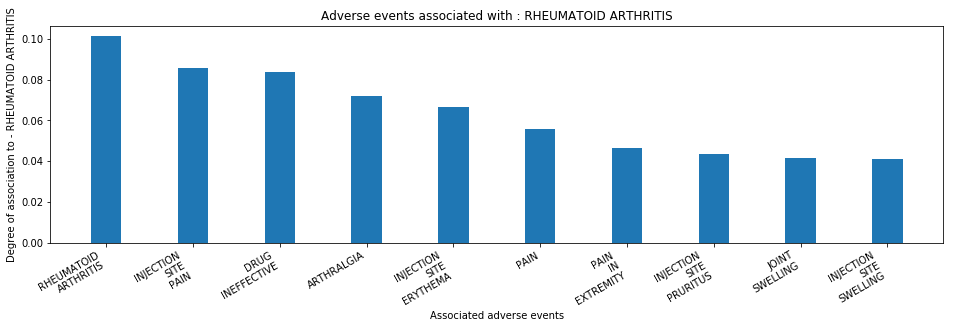

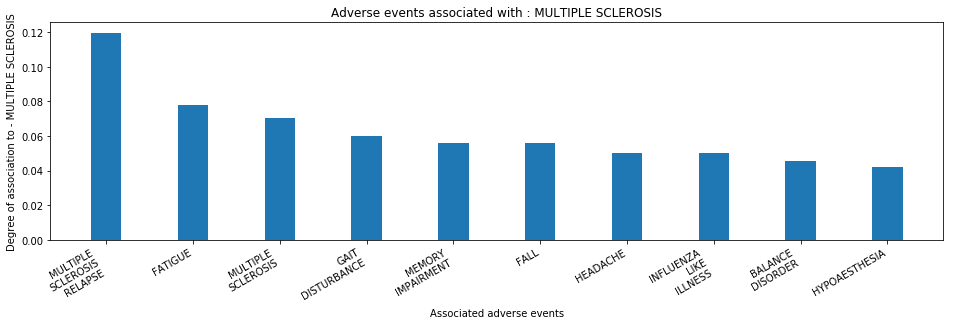

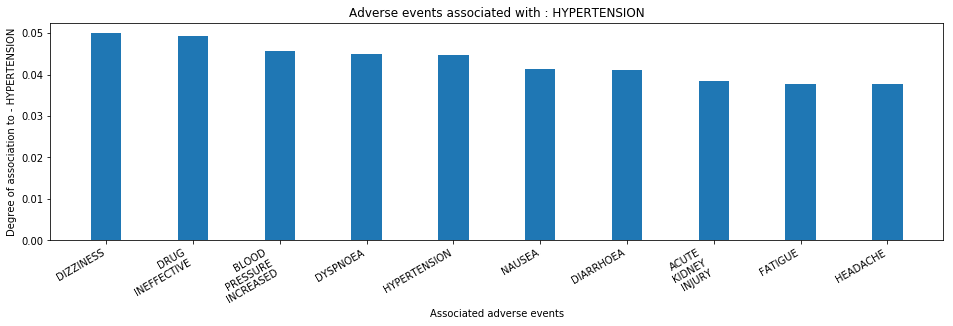

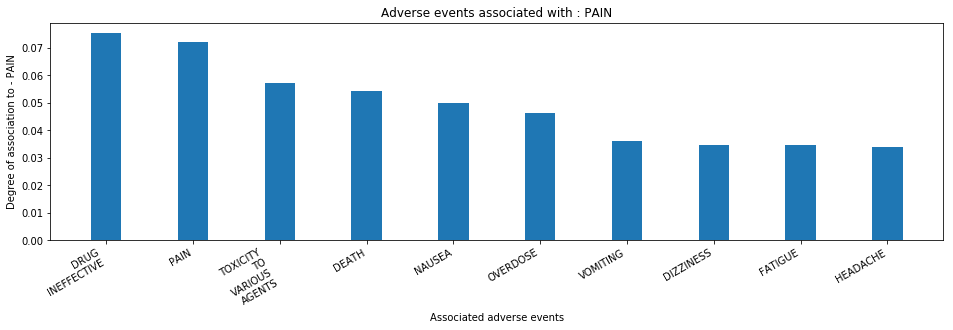

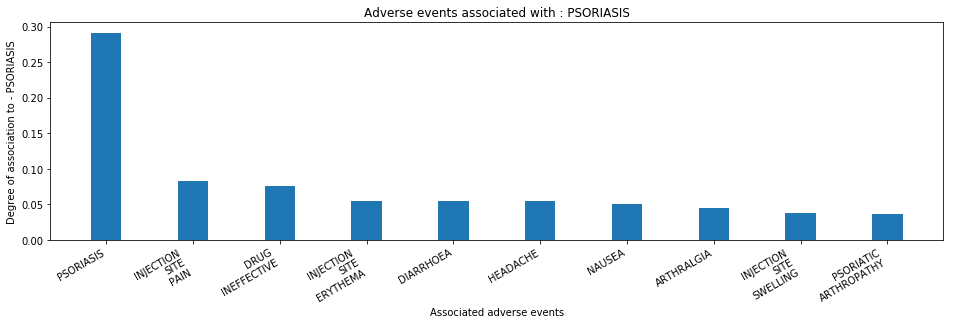

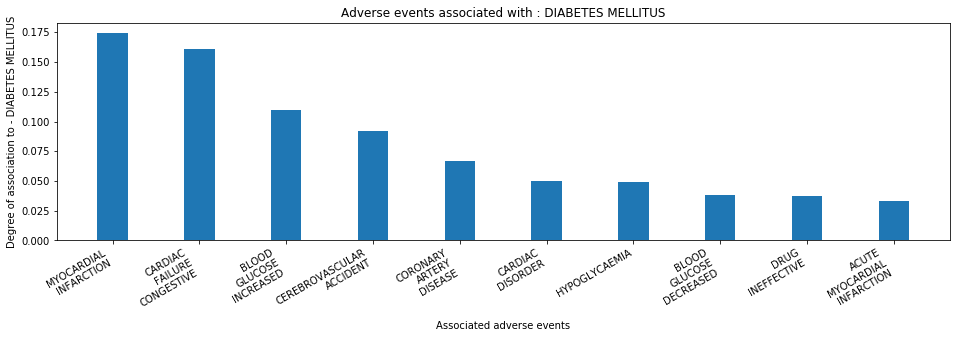

In [14]:
# Finding top 10 associated adverse events for top 6 disease areas
plt.rcParams['figure.figsize'] = [16, 4]  # Fixing figure size (for this and all subsequent plots)
num_top_disease_areas_to_plot = 6
for disease_area in disease_area_list[1:num_top_disease_areas_to_plot + 1]:
    _ = find_associated_adverse_events(disease_area, 10)

##### Conclusion:

Different disease areas tend to have a set of associated adverse events, but the most likely ones are related to disease relapses or ineffectiveness of the drug.

##### Note:
The associations should **NOT** be interpreted as that the occurrence of adverse event 'A' is most likely when patients take medications for disease area 'D' (as a causal relationship). 

Serious adverse events might usually be given higher priority when it comes to reporting. Thus, in case of diabetes mellitus for example, 'myocardial infarction' might not be the most likely side effect of diabetes related drugs. But diabetic medications involving such adverse events are most likely to be reported. 

Any causal inference would call for an in-depth analysis by a medical expert. These visuals can serve as a starting point for further investigation.